# **Example of Convolutional Neural Networks with Pytorch**
From the book Deep Learning with Pytorch, chapter 8

In order to run this example more quickly in Google Colab, you must activate the GPU, by choosing Runtime -> Change runtime type -> GPU


Load the matplotlib library and set the graphics to be plotted within the Jupyter notebook

Also load the PyTorch library, and fix the random seed to ensure the reproducibility of the results

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

Establish the 10 classes that are available in the CIFAR10 dataset, see https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

Download the training data for the CIFAR10 dataset, upzip it to the virtual 
folder ../data-unversioned/p1ch6/ and store it as the `cifar10` variable

In [ ]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch6/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Extracting ../data-unversioned/p1ch6/cifar-10-python.tar.gz to ../data-unversioned/p1ch6/


Download the validation data for the CIFAR10 dataset, upzip it to the virtual 
folder ../data-unversioned/p1ch6/ and store it as the `cifar10_val` variable

In [ ]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


Select the classes that the CNN will classify, namely the airplane (index 0) and bird (index 2) classes

Then extract a subset of the full training CIFAR10 dataset which contains the training samples of those two classes into the `cifar2` variable, and a subset of the full validation CIFAR10 dataset with the validation samples of these two classes into the `cifar2_val` variable

In [ ]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

Create a fully connected model with four linear layers and three hyperbolic tangent layers

In [ ]:
connected_model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

Print out the overall number of parameters of the fully connected model, and the number of parameters per layer

In [ ]:
numel_list = [p.numel()
              for p in connected_model.parameters()
              if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

Create a `first_model` model with two linear layers, a hyperbolic tangent layer, and a soft max layer at the end to yield the classification result

In [ ]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

Print out the overall number of parameters of the `first_model` model, and the number of parameters per layer

In [ ]:
numel_list = [p.numel() for p in first_model.parameters()]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

Create a linear layer with 3072 input features and 1024 output features

Then print out the number of synaptic weights and the number of biases of the linear layer

In [ ]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

Create a two dimensional convolutional layer with 3 input channels, 16 output channels, and kernel size 3. The stride is left to the default value, which is 1. See page 197 of the book.

In [ ]:
conv = nn.Conv2d(3, 16, kernel_size=3) # <1>
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

Print out the number of synaptic weights and the number of biases of the convolutional layer. See page 197 of the book.

In [ ]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

Extract the first training image (index 0) from the `cifar2` variable to the `img` variable

Then apply the convolutional layer to the image and put the result into the `output` variable

See page 198 of the book.

In [ ]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

Show the first training image

Then show the same image, converted to grayscale



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


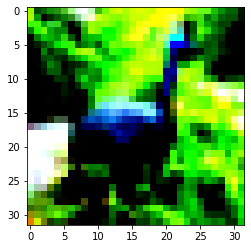

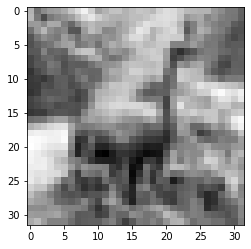

In [ ]:
plt.imshow(np.transpose(img,(1, 2, 0)))
plt.show()

plt.imshow(img.mean(0), cmap='gray')
plt.show()

In [ ]:
output[0,0].shape

torch.Size([30, 30])

Show the first channel of the output of the convolutional layer to the left

Then show the input (converted to grayscale) to the convolutional layer to the right

Please note that the output is two pixels smaller than the input, due to the lack of padding in the convolutional layer

See page 198 of the book.

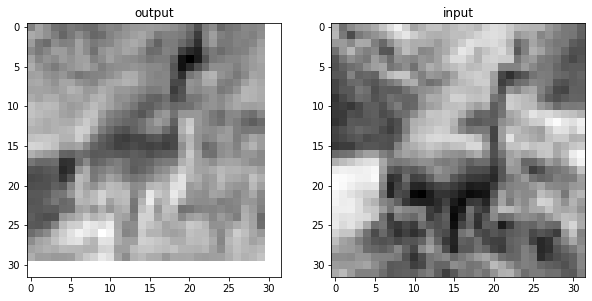

In [ ]:
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F2_PyTorch.png')  # bookskip
plt.show()

Create a two dimensional convolutional layer with 3 input channels, 1 output channel, and kernel size 3. The stride is left to the default value, which is 1. The padding is set to 1

Then apply the convolutional layer to the fisrt training image, and put the result in the `output` variable. Please note that this time the output is the same size as the input, due to the padding.

See page 199 of the book.

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1) # <1>
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

Set the biases of the convolutional layer to zero. Then set the synaptic weights of the convolutional layer to 1.0/9.0. This corresponds to an averaging convolutional filter of size 3 x 3 pixels. See page 200 of the book.

In [ ]:
with torch.no_grad():
    conv.bias.zero_()
    
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

Plot the output of the convolutional layer to the left and the input to the right. Please note that the output is the same size as the input, due to the padding in the convolutional layer

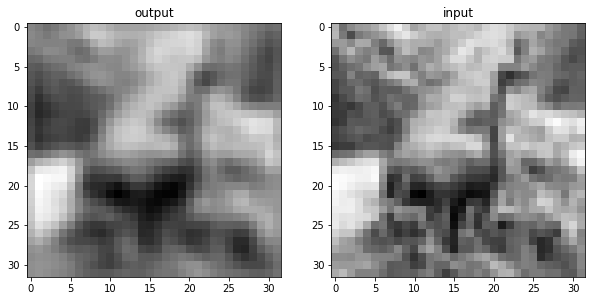

In [ ]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F4_PyTorch.png')  # bookskip
plt.show()

Set the synaptic weights of the convolutional layer to a vertical edge detection filter. The biases are set to zero. See pages 200-201 of the book.

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

Plot the output of the convolutional layer to the left, and the grayscale version of the input to the right.

Please note that the vertical edges are detected by the convolutional layer. They are viewed as very dark or very bright pixels in the output image.

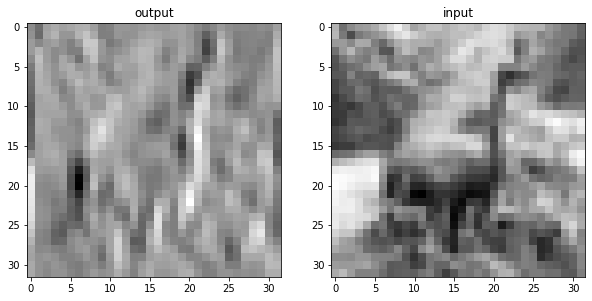

In [ ]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F5_PyTorch.png')  # bookskip
plt.show()

Create a two dimensional max pooling layer `pool` with a pooling window of size 2x2. Then the input image is processed by the `pool` layer. Please note that the output has half the size of the input image, due to the 2x2 pooling. See page 204 of the book.

In [ ]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

Create a model with several layers: first a two dimensional convolutional layer, then a hyperbolic tangent layer, then a two dimensional max pooling layer, and then the same again. Store it into the `model` variable. See page 205 of the book.

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ...
            )

Create a model with the same structure as the previous model, but with three additional layers: a linear layer, a hyperbolic tangent layer, and a final linear layer. Store it into the `model` variable. See page 206 of the book.





In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ... <1>
            nn.Linear(8 * 8 * 8, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

Print out the total number of parameter of the model, and the number of parameters per layer.

In [ ]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

The previous model does not work because we need something to flatten the output of the last max pooling layer to reshape it before the first linear layer. Please see page 207 of the book. If you uncomment the following line, you will get an error when you try to process an input image with the model.

In [ ]:
#model(img.unsqueeze(0))

Next, a subclass of the `nn.Module` class is defined. In order to do so, the constructor of the class (`__init__`) and the `forward` method are defined. This is the minimum necessary methods that must be defined (see pages 207-208 of the book). The reshape that was necessary earlier is done by the following line:

`out = out.view(-1, 8 * 8 * 8)`

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8) # <1>
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

Create an instance of the `Net` subclass of the `nn.Module` class, and store the instance into the `model` variable. 

Print out the overall number of parameters of `model`, and the number of parameters of each of its layers.

See page 210 of the book.

In [ ]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

Create a new version of the `Net` subclass of the `nn.Module` class. This time, the functional versions of the hyperbolic tangent layer (`torch.tanh`) and the two dimensional max pooling layer (`F.max_pool2d`) are employed. This is possible because the hyperbolic tangent and max pooling layers have no parameters.

See pages 210-211 of the book.

In [ ]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

Process the input image with the current version of the model. The model processes the image correctly and outputs a vector with two real numbers, which represent the scores of the two classes. See pages 211-212 of the book.

In [ ]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.0157,  0.1143]], grad_fn=<AddmmBackward>)

Define a standalone function that implements a training loop for the previously defined model. It receives as arguments the number of epochs, the optimizer, the model, the loss function, and the loader of the training images (inputs) and training labels (outputs). See page 212 of the book.

The progress of the training is printed out. The average loss per training sample is printed.

In [ ]:
import datetime  # <1>

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):  # <2>
        loss_train = 0.0
        for imgs, labels in train_loader:  # <3>
            
            outputs = model(imgs)  # <4>
            
            loss = loss_fn(outputs, labels)  # <5>

            optimizer.zero_grad()  # <6>
            
            loss.backward()  # <7>
            
            optimizer.step()  # <8>

            loss_train += loss.item()  # <9>

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))  # <10>

Create a data loader for the training samples associated to the `cifar2` variable. Then create an instance of our custom defined model. After that, create a optimizer based on stochastic gradient descent (SGD), and a cross-entropy loss function. Cross entropy is adequate for classification problems, including multiclass classification. Binary entropy can be employed for binary classification only.

Finally, execute the training by calling the `training_loop` function. See page 213 of the book.

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)  # <1>

model = Net()  #  <2>
optimizer = optim.SGD(model.parameters(), lr=1e-2)  #  <3>
loss_fn = nn.CrossEntropyLoss()  #  <4>

training_loop(  # <5>
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2020-10-03 17:55:27.078881 Epoch 1, Training loss 0.5634812323530768
2020-10-03 17:56:00.103509 Epoch 10, Training loss 0.3277595060266507
2020-10-03 17:56:37.087113 Epoch 20, Training loss 0.3035030489324764
2020-10-03 17:57:13.835663 Epoch 30, Training loss 0.2824554865717129
2020-10-03 17:57:50.599682 Epoch 40, Training loss 0.261043845468266
2020-10-03 17:58:26.998810 Epoch 50, Training loss 0.24096738822331096
2020-10-03 17:59:03.601568 Epoch 60, Training loss 0.21990723030012885
2020-10-03 17:59:42.002751 Epoch 70, Training loss 0.20366100905237683
2020-10-03 18:00:21.502142 Epoch 80, Training loss 0.18935413122366948
2020-10-03 18:01:00.062262 Epoch 90, Training loss 0.17276086364012616
2020-10-03 18:01:38.761341 Epoch 100, Training loss 0.1613998900932871


Next we are going to measure the accuracy of the trained classifier on the training and validation sets. See page 214 of the book.

First, a data loader for the training set `train_loader` and another data loader for the validation set `val_loader` are created.

The `validate` function is defined to count the number of correct and incorrect classifications, computed over the training and validation sets. Then the accuracies are printed out.

Finally, the `validate` function is executed to compute the accuracies.

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():  # <1>
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <2>
                total += labels.shape[0]  # <3>
                correct += int((predicted == labels).sum())  # <4>

        print("Accuracy {}: {:.2f}".format(name , correct / total))

validate(model, train_loader, val_loader)

Accuracy train: 0.93
Accuracy val: 0.89


The trained model is saved to a file. See page 214 of the book.

In [ ]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

Next the saved model is loaded. See page 215 of the book.

In [ ]:
loaded_model = Net()  # <1>
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt'))

<All keys matched successfully>

Check out whether the training is done on the CPU or the GPU. See page 215 of the book.

In [ ]:
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))
print(f"Training on device {device}.")

Training on device cuda.


Redefine the `training_loop` function so that the data are moved to the GPU if one is available. See page 215 of the book.

In [ ]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)  # <1>
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))

Execute the training again, this time with the data on the GPU if available. If a GPU is available, the training should be faster than before. See page 216 of the book.

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = Net().to(device=device)  # <1>
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2020-10-03 18:01:52.450758 Epoch 1, Training loss 0.5717794697755462
2020-10-03 18:01:55.928444 Epoch 10, Training loss 0.32852893906414127
2020-10-03 18:01:59.649477 Epoch 20, Training loss 0.29495166365508063
2020-10-03 18:02:03.231366 Epoch 30, Training loss 0.2696891484936331
2020-10-03 18:02:06.955153 Epoch 40, Training loss 0.24715986933298173
2020-10-03 18:02:10.640782 Epoch 50, Training loss 0.22627683733678927
2020-10-03 18:02:14.395084 Epoch 60, Training loss 0.20998757788140304
2020-10-03 18:02:18.122614 Epoch 70, Training loss 0.1935278656566219
2020-10-03 18:02:21.741315 Epoch 80, Training loss 0.17991850624798209
2020-10-03 18:02:25.358279 Epoch 90, Training loss 0.16617709111161294
2020-10-03 18:02:28.984232 Epoch 100, Training loss 0.1566371135176367


Redefine the `validate` function so that the data are moved to the GPU, if available.

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)
all_acc_dict = collections.OrderedDict()

def validate(model, train_loader, val_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <1>
                total += labels.shape[0]
                correct += int((predicted == labels).sum())

        print("Accuracy {}: {:.2f}".format(name , correct / total))
        accdict[name] = correct / total
    return accdict

all_acc_dict["baseline"] = validate(model, train_loader, val_loader)

Accuracy train: 0.93
Accuracy val: 0.89


Load a saved model to the GPU. PyTorch is explicitly instructed to load the model to the GPU, even if the model was saved from the CPU. See page 217 of the book.

In [ ]:
loaded_model = Net().to(device=device)
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt',
                                        map_location=device))

<All keys matched successfully>

Create a new sublass NetWidth of the nn.Module class which defines a model with more channels coming from the first convolution. See page 218 of the book.

In [ ]:
class NetWidth(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 16 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

Train the newly defined model.

In [ ]:
model = NetWidth().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

validate(model, train_loader, val_loader)

2020-10-03 18:02:29.694127 Epoch 1, Training loss 0.569658173117668
2020-10-03 18:02:33.313754 Epoch 10, Training loss 0.32219793481431946
2020-10-03 18:02:37.268091 Epoch 20, Training loss 0.2805888512331969
2020-10-03 18:02:41.199511 Epoch 30, Training loss 0.24591600890182386
2020-10-03 18:02:45.106859 Epoch 40, Training loss 0.21832924896174935
2020-10-03 18:02:49.015188 Epoch 50, Training loss 0.19432437609715067
2020-10-03 18:02:52.917829 Epoch 60, Training loss 0.17152156078132094
2020-10-03 18:02:56.929907 Epoch 70, Training loss 0.14893593696082474
2020-10-03 18:03:00.941066 Epoch 80, Training loss 0.1271450824466101
2020-10-03 18:03:04.860362 Epoch 90, Training loss 0.10680842508745801
2020-10-03 18:03:08.802123 Epoch 100, Training loss 0.08849463259480941
Accuracy train: 0.96
Accuracy val: 0.89


{'train': 0.9629, 'val': 0.89}

Redefine the `NetWidth` subclass by setting the number of channels (`n_chans1`) as a parameter of the class constructor. See page 218 of the book.

In [ ]:
class NetWidth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out


Train the previously defined model.

In [ ]:
model = NetWidth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["width"] = validate(model, train_loader, val_loader)

2020-10-03 18:03:09.547623 Epoch 1, Training loss 0.5444508557486686
2020-10-03 18:03:13.137061 Epoch 10, Training loss 0.3170753327334762
2020-10-03 18:03:17.169568 Epoch 20, Training loss 0.2745351647115817
2020-10-03 18:03:21.119276 Epoch 30, Training loss 0.24255374937680116
2020-10-03 18:03:25.178132 Epoch 40, Training loss 0.21334258348319182
2020-10-03 18:03:29.318903 Epoch 50, Training loss 0.1869265928295008
2020-10-03 18:03:33.381884 Epoch 60, Training loss 0.16310881932449947
2020-10-03 18:03:37.339210 Epoch 70, Training loss 0.14082480271815495
2020-10-03 18:03:41.311957 Epoch 80, Training loss 0.11995151366113098
2020-10-03 18:03:45.340468 Epoch 90, Training loss 0.10072586221537393
2020-10-03 18:03:49.395462 Epoch 100, Training loss 0.08321558117012309
Accuracy train: 0.96
Accuracy val: 0.90


Check that the number of parameters of the wider model is higher than that of the previous model, due to the extra channels.

In [ ]:
sum(p.numel() for p in model.parameters())

38386

Redefine the training loop to include L2 regularization, also known as weight decay. See pages 219-220 of the book.

Please note that the `l2_lambda` hyperparameter controls how strongly large weights are penalized.

In [ ]:
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn,
                        train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum()
                          for p in model.parameters())  # <1>
            loss = loss + l2_lambda * l2_norm

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))


Train the model with L2 regularization.

In [ ]:
model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop_l2reg(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["l2 reg"] = validate(model, train_loader, val_loader)

2020-10-03 18:03:50.235941 Epoch 1, Training loss 0.5842778145507642
2020-10-03 18:03:55.028003 Epoch 10, Training loss 0.36634593224449524
2020-10-03 18:04:00.554594 Epoch 20, Training loss 0.32257517868546165
2020-10-03 18:04:05.918086 Epoch 30, Training loss 0.2961528061112021
2020-10-03 18:04:11.349903 Epoch 40, Training loss 0.27755376971830986
2020-10-03 18:04:16.746664 Epoch 50, Training loss 0.26365615019373073
2020-10-03 18:04:22.136931 Epoch 60, Training loss 0.2515724055516492
2020-10-03 18:04:27.569813 Epoch 70, Training loss 0.24009247911963494
2020-10-03 18:04:33.089622 Epoch 80, Training loss 0.22937037563248044
2020-10-03 18:04:38.525146 Epoch 90, Training loss 0.21903633013082918
2020-10-03 18:04:43.934506 Epoch 100, Training loss 0.20924322819633848
Accuracy train: 0.90
Accuracy val: 0.87


Define a subclass `NetDropout` of the `nn.Module` class that implements dropout to prevent overfitting. See pages 220-221 of the book.

In [ ]:
class NetDropout(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

Train the model with dropout.

In [ ]:
model = NetDropout(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["dropout"] = validate(model, train_loader, val_loader)

2020-10-03 18:04:44.642521 Epoch 1, Training loss 0.5800063126026445
2020-10-03 18:04:48.546815 Epoch 10, Training loss 0.38075151071426977
2020-10-03 18:04:52.921916 Epoch 20, Training loss 0.3490986672176677
2020-10-03 18:04:57.251185 Epoch 30, Training loss 0.3297802624618931
2020-10-03 18:05:01.573154 Epoch 40, Training loss 0.3125718879471919
2020-10-03 18:05:05.912474 Epoch 50, Training loss 0.29208953223031037
2020-10-03 18:05:10.175956 Epoch 60, Training loss 0.28206183538315405
2020-10-03 18:05:14.415267 Epoch 70, Training loss 0.2723569439095297
2020-10-03 18:05:18.647266 Epoch 80, Training loss 0.26272309443373587
2020-10-03 18:05:22.986824 Epoch 90, Training loss 0.25365989014601253
2020-10-03 18:05:27.312741 Epoch 100, Training loss 0.2399924808436898
Accuracy train: 0.89
Accuracy val: 0.88


Create a `NetBatchNorm` subclass of the `nn.Module` that implements batch normalization in order to speed up the learning and carry out regularization. See page 222 of the book.

In [ ]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, 
                               padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

Train the model with batch normalization

In [ ]:
model = NetBatchNorm(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["batch_norm"] = validate(model, train_loader, val_loader)

2020-10-03 18:05:28.186618 Epoch 1, Training loss 0.47399871915009373
2020-10-03 18:05:32.472403 Epoch 10, Training loss 0.25980775314531507
2020-10-03 18:05:37.259258 Epoch 20, Training loss 0.19415953688940424
2020-10-03 18:05:42.018627 Epoch 30, Training loss 0.14398394067101417
2020-10-03 18:05:46.845721 Epoch 40, Training loss 0.10277671833184494
2020-10-03 18:05:51.664310 Epoch 50, Training loss 0.0668683294681417
2020-10-03 18:05:56.532233 Epoch 60, Training loss 0.04168906228343962
2020-10-03 18:06:01.310366 Epoch 70, Training loss 0.028529456552640078
2020-10-03 18:06:06.149025 Epoch 80, Training loss 0.016165737472000015
2020-10-03 18:06:11.001029 Epoch 90, Training loss 0.08539414252925688
2020-10-03 18:06:15.801016 Epoch 100, Training loss 0.008903632279349028
Accuracy train: 1.00
Accuracy val: 0.89


Create a NetDepth subclass of the nn.Module class that implements a deeper neural architecture. See pages 223-224 of the book.

In [ ]:
class NetDepth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

Train the deeper model.

In [ ]:
model = NetDepth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["depth"] = validate(model, train_loader, val_loader)

2020-10-03 18:06:16.572636 Epoch 1, Training loss 0.6548030710524055
2020-10-03 18:06:20.644653 Epoch 10, Training loss 0.33995750451543527
2020-10-03 18:06:25.141102 Epoch 20, Training loss 0.3013665283181865
2020-10-03 18:06:29.644013 Epoch 30, Training loss 0.27265951322142484
2020-10-03 18:06:34.153608 Epoch 40, Training loss 0.24402576827319564
2020-10-03 18:06:38.650839 Epoch 50, Training loss 0.21670965219189406
2020-10-03 18:06:43.130695 Epoch 60, Training loss 0.19082109051145565
2020-10-03 18:06:47.634764 Epoch 70, Training loss 0.1669179356544261
2020-10-03 18:06:52.140406 Epoch 80, Training loss 0.14440111441027587
2020-10-03 18:06:56.633855 Epoch 90, Training loss 0.12107962006880979
2020-10-03 18:07:01.245959 Epoch 100, Training loss 0.09873796572351153
Accuracy train: 0.95
Accuracy val: 0.90


Create a `NetRes` subclass of the `nn.Module` class that defines a residual network. See pages 223-225 of the book.

In [ ]:
class NetRes(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

Train the residual network.

In [ ]:
model = NetRes(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res"] = validate(model, train_loader, val_loader)

2020-10-03 18:07:02.018285 Epoch 1, Training loss 0.6650007108973849
2020-10-03 18:07:06.218349 Epoch 10, Training loss 0.3292970836732038
2020-10-03 18:07:10.882019 Epoch 20, Training loss 0.2861516498456335
2020-10-03 18:07:15.432902 Epoch 30, Training loss 0.2552978458108416
2020-10-03 18:07:20.007694 Epoch 40, Training loss 0.228219348296618
2020-10-03 18:07:24.591479 Epoch 50, Training loss 0.20221760252099127
2020-10-03 18:07:29.277774 Epoch 60, Training loss 0.17716037937600143
2020-10-03 18:07:33.849279 Epoch 70, Training loss 0.15272267215001356
2020-10-03 18:07:38.489067 Epoch 80, Training loss 0.12769096252170337
2020-10-03 18:07:43.093121 Epoch 90, Training loss 0.10287515535523557
2020-10-03 18:07:47.922339 Epoch 100, Training loss 0.0795267750598063
Accuracy train: 0.96
Accuracy val: 0.89


Create a `ResBlock` subclass of the `nn.Module` class that defines a block of convolution, activation and skip connection. See page 227 of the book. 

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3,
                              padding=1, bias=False)  # <1>
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight,
                                      nonlinearity='relu')  # <2>
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x

Create a `NetResDeep` subclass of the `nn.Module` class that defines a very deep residual network composed of `ResBlock` blocks. The number of blocks is given by the `n_blocks` parameter to the class constructor. See page 227 of the book.

In [ ]:
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out
    


Train the very deep residual network composed of `ResBlock` blocks.

In [ ]:
model = NetResDeep(n_chans1=32, n_blocks=100).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res deep"] = validate(model, train_loader, val_loader)

2020-10-03 18:07:58.092228 Epoch 1, Training loss 2.273136031096149
2020-10-03 18:09:26.758649 Epoch 10, Training loss 0.3788222589880038
2020-10-03 18:11:05.044976 Epoch 20, Training loss 0.30534596247657847
2020-10-03 18:12:43.850345 Epoch 30, Training loss 0.25487877960038036
2020-10-03 18:14:22.806756 Epoch 40, Training loss 0.2085157937969372
2020-10-03 18:16:01.583172 Epoch 50, Training loss 0.15721193136303288


Compare the performance of the previously trained models, in terms of training and validation accuracy. See pages 228-229 of the book.

In [ ]:
trn_acc = [v['train'] for k, v in all_acc_dict.items()]
val_acc = [v['val'] for k, v in all_acc_dict.items()]

width =0.3
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='val')
plt.xticks(np.arange(len(val_acc))+ width/2, list(all_acc_dict.keys()),
           rotation=60)
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim(0.7, 1)
plt.savefig('accuracy_comparison.png', bbox_inches='tight')
plt.show()
